<a href="https://colab.research.google.com/github/jagriti204006/BonjourDilli/blob/main/MLques1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:

# Importing the database

import pandas as pd
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,AGE,DISTANCE,ROOMS,TAX,PTRATIO,SIZE,LOCATION,PRICE (IN L)
0,0.00632,65.2,4.0900,1,296,15.3,396.90,Delhi,24.0
1,0.02731,78.9,4.9671,2,242,17.8,396.90,Mumbai,21.6
2,0.02729,61.1,4.9671,2,242,17.8,392.83,Hyderabad,34.7
3,0.03237,45.8,6.0622,3,222,18.7,394.63,Delhi,33.4
4,0.06905,54.2,6.0622,3,222,18.7,396.90,Mumbai,36.2


In [32]:
df.shape

(506, 9)

In [33]:
#  Data Pre-processing
df.isnull().sum()

CRIM            20
AGE             20
DISTANCE         0
ROOMS            0
TAX              0
PTRATIO          0
SIZE             0
LOCATION         0
PRICE (IN L)     0
dtype: int64

In [34]:
df = df.fillna(method='bfill').fillna(method='ffill')

In [35]:
df.isnull().sum()

CRIM            0
AGE             0
DISTANCE        0
ROOMS           0
TAX             0
PTRATIO         0
SIZE            0
LOCATION        0
PRICE (IN L)    0
dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
df['LOCATION'] = labelenc.fit_transform(df['LOCATION'])

df.head(10)

,CRIM,AGE,DISTANCE,ROOMS,TAX,PTRATIO,SIZE,LOCATION,PRICE (IN L)
0,0.00632,65.2,4.0900,1,296,15.3,396.90,0,24.0
1,0.02731,78.9,4.9671,2,242,17.8,396.90,2,21.6
2,0.02729,61.1,4.9671,2,242,17.8,392.83,1,34.7
3,0.03237,45.8,6.0622,3,222,18.7,394.63,0,33.4
4,0.06905,54.2,6.0622,3,222,18.7,396.90,2,36.2
5,0.02985,58.7,6.0622,3,222,18.7,394.12,1,28.7
6,0.08829,66.6,5.5605,5,311,15.2,395.60,0,22.9
7,0.14455,96.1,5.9505,5,311,15.2,396.90,2,27.1
8,0.21124,100.0,6.0821,5,311,15.2,386.63,1,16.5
9,0.17004,85.9,6.5921,5,311,15.2,386.71,0,18.9


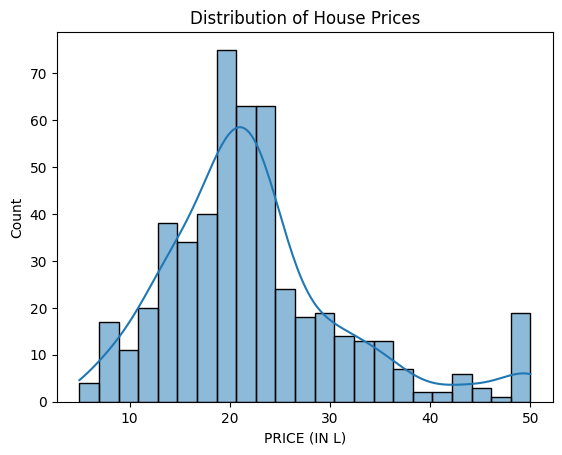

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['PRICE (IN L)'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

In [43]:

# Training the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_train, y_train)
print(f'Score = {score}')

y_pred = model.predict(X_test)



Score = 0.47641408656079076


In [44]:
# Calcultaing the accuracy using Root mean square error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE: ", rmse)


RMSE:  9.349178627856164


In [45]:
# Calclating the Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 6.493986313607619
